#                                **Project**

# **Predict health insurance prices for individuals/families based on demographics.**


# **Step 1: Business & Data Understanding**
# ------------------------------------------------------

#**Objective**: Predict health insurance prices for individuals/families based on demographics.

# **Importance**: Helps insurance firms price plans fairly and detect anomalies.

#**Goal**: Predict medical insurance charges using patient information.

#**Use Case**: Help insurers price policies more accurately.

#**Target Variable**: charges

#**Type of ML Problem**: Regression







# **Step 2: Data Understanding**
# In this step, we import the necessary libraries and load the dataset. We also perform initial inspections to understand the structure of the data.

In [68]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, RobustScaler

In [38]:
# 2. Load Dataset
file_path = '/content/4021579-Health_insurance_cost.xlsx'
df = pd.read_excel(file_path)


In [39]:
# 3. Renaming columns
df.rename(columns={
    'gender': 'sex',
    'BMI': 'bmi',
    'Children': 'children',
    'smoking_status': 'smoker',
    'location': 'region',
    'health_insurance_price': 'charges'
}, inplace=True)

In [40]:
# 4. Ensure column names are clean
df.columns = df.columns.str.strip()

#  Show column names for confirmation
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [41]:
# 5. Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    age     sex     bmi  children smoker     region      charges
0  19.0  female     NaN         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520


In [42]:
# 6. Dataset shape
print("\nDataset Shape:")
print(df.shape)  # (Rows, Columns)


Dataset Shape:
(1338, 7)


In [43]:
# 7. Dataset info (Column types, Non-null counts, Dtype)
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1310 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1315 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [44]:
# 8. Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age         28
sex          0
bmi         23
children     0
smoker       0
region       0
charges      2
dtype: int64


In [45]:
# 9. Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age          bmi     children       charges
count  1310.000000  1315.000000  1338.000000   1336.000000
mean     39.166412    30.638217     1.094918  13268.527719
std      14.055378     6.110302     1.205493  12112.797724
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.210000     0.000000   4744.325050
50%      39.000000    30.305000     1.000000   9382.033000
75%      51.000000    34.580000     2.000000  16604.302645
max      64.000000    53.130000     5.000000  63770.428010


In [46]:
# 10. Summary statistics for categorical columns
print("\nCategorical Feature Summary:")
print(df.describe(include=['object']))


Categorical Feature Summary:
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [47]:
# 11. Unique values in each column
print("\nUnique Values Per Column: ")
for col in df.columns:
    print(f"{col}:      {df[col].nunique()} unique values")



Unique Values Per Column: 
age:      47 unique values
sex:      2 unique values
bmi:      545 unique values
children:      6 unique values
smoker:      2 unique values
region:      4 unique values
charges:      1335 unique values


In [48]:
# 12. Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
1


# Exploratory Data Analysis (EDA)
#In this step, we visualize the data to understand the distributions of various features and their relationships with the target variable.

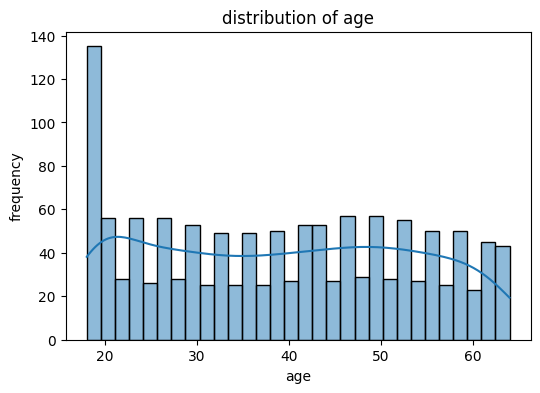

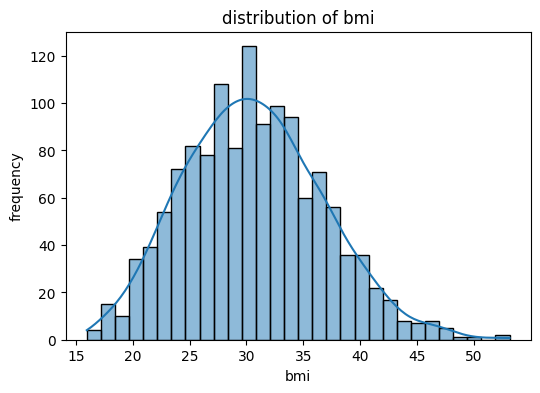

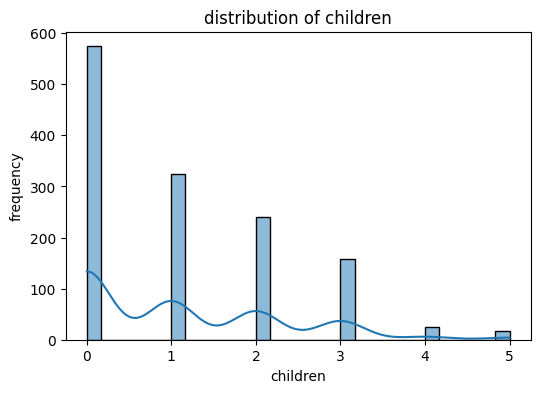

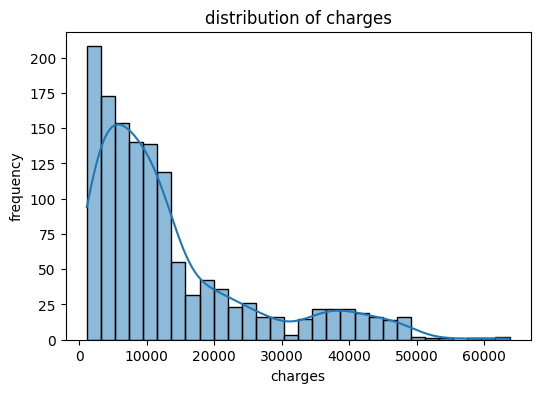

In [49]:
# 13. histogram for neumerical columns
numerical_cols = ['age','bmi','children','charges']

for col in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True, bins = 30)
  plt.title(f'distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

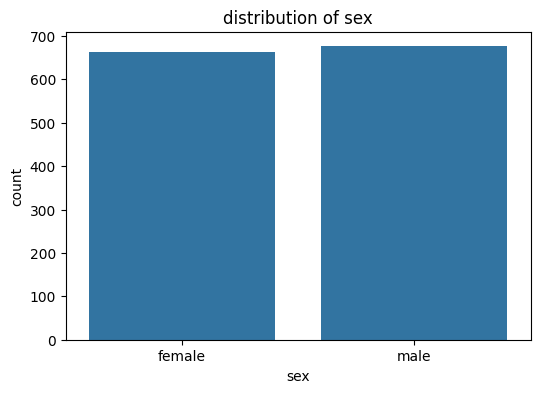

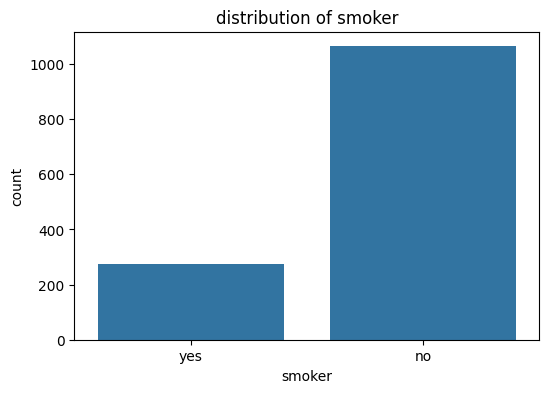

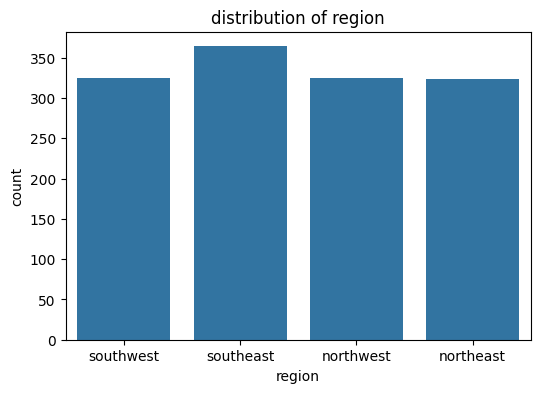

In [50]:
# 14. Bar Chart for categorical columns
categorical_cols = ['sex','smoker','region']

for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col,data=df)
  plt.title(f'distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()


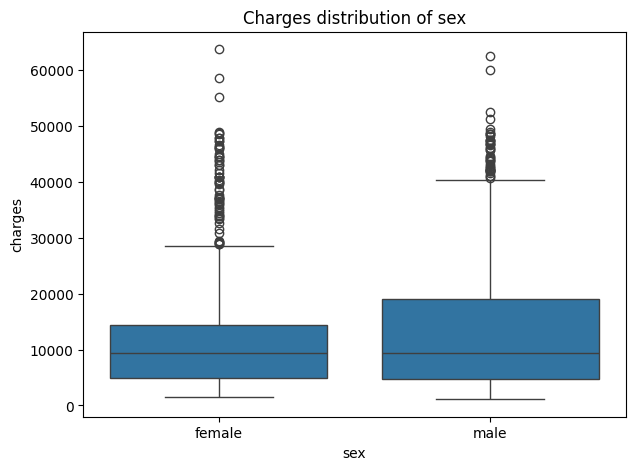

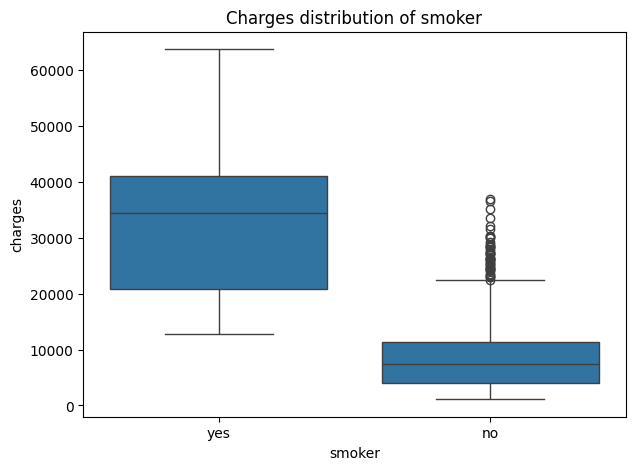

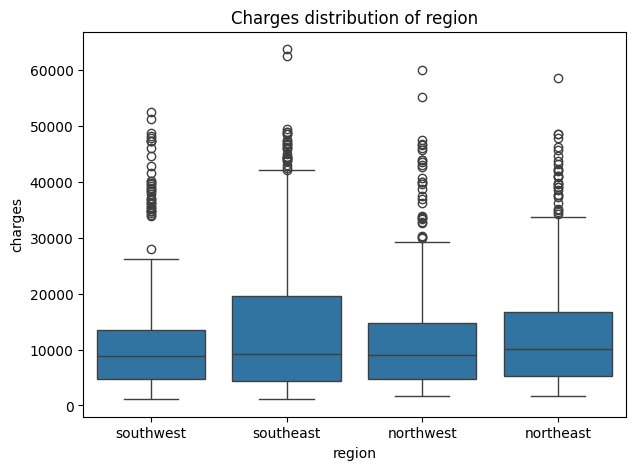

In [51]:
# 15. Boxplot to show statistical summery
categorical_cols = ['sex','smoker','region']

for col in categorical_cols:
  plt.figure(figsize=(7,5))
  sns.boxplot(x=col,y='charges',data=df)
  plt.title(f'Charges distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('charges')
  plt.show()


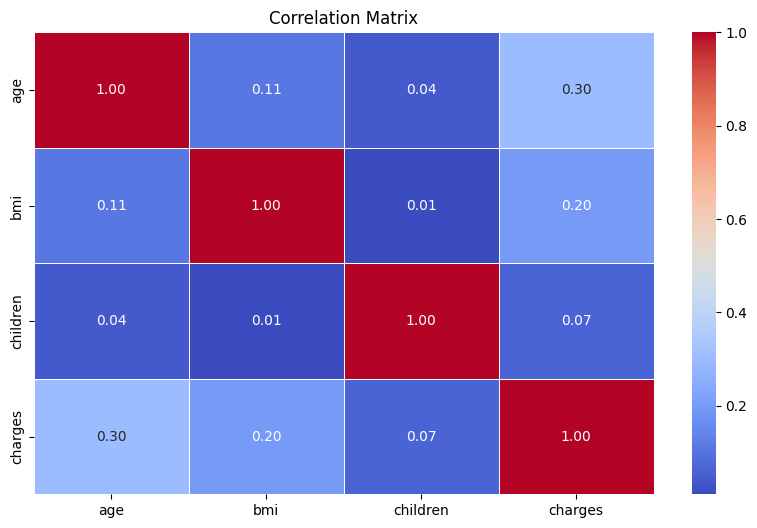

In [52]:
# 16. Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

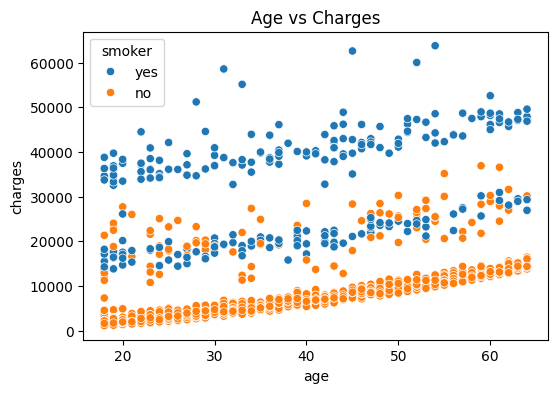

In [53]:
# 17. Scatterplot for age vs charges showing difference of smoker and non smoker

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs Charges")


# **Step 3: Data Preperation**
#In this step, we prepare the data for modeling. This includes handling outliers, dublicate, missing values, encoding categorical variables and scaling numerical features.

In [54]:
# 18. Handling Dublicate

print("Handling Dublicate :-\n")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicate_count}")

# Shape of data
print(f"\n Original Shape: {df.shape}")

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify removal
print(f"\n New dataset shape after removing duplicates: {df.shape}")

Handling Dublicate :-


 Number of duplicate rows: 1

 Original Shape: (1338, 7)

 New dataset shape after removing duplicates: (1337, 7)


In [55]:
# 19. Handling Missing Values

print("Handling Missing Values :-\n")

# Step 1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 2: Choose imputation method based on data type
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            # For numeric data: use mean or median
            df[col].fillna(df[col].mean(), inplace=True)  # you can also use median()
            print(f"Filled missing values in '{col}' with mean: {df[col].mean():.2f}")
        else:
            # For categorical data: use mode or ffill/bfill
            df[col].fillna(df[col].mode()[0], inplace=True)  # or use ffill(), bfill()
            print(f"Filled missing values in '{col}' with mode: {df[col].mode()[0]}")

# Step 3: Confirm no missing values remain
print("\n✅ Missing values after imputation:")
print(df.isnull().sum())


Handling Missing Values :-

Missing values in each column:
age         28
sex          0
bmi         23
children     0
smoker       0
region       0
charges      2
dtype: int64
Filled missing values in 'age' with mean: 39.18
Filled missing values in 'bmi' with mean: 30.64
Filled missing values in 'charges' with mean: 13277.24

✅ Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


/tmp/ipython-input-55-664491927.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # you can also use median()


In [56]:
# 20. Handling Outliers

print("Outliers can be handeled by using Z-Score or IQR:- \n ")

from scipy.stats import zscore

# First Detecting Outliers using Z-Score
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).sum()
print(" 1. Outliers detected using Z-Score:\n", outliers_z)

Outliers can be handeled by using Z-Score or IQR:- 
 
 1. Outliers detected using Z-Score:
 30


In [57]:
# Detecting Outliers using IQR

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\n2. Outliers detected using IQR:\n", outliers_iqr)


2. Outliers detected using IQR:
 age           0
bmi          11
children      0
charges     141
dtype: int64


In [58]:
# Handling outliers Using IQR

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Consider only numerical columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)



# Filter out outliers
df_cleaned = df[~outliers_mask.any(axis=1)]

print("Original Data Shape:", df.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)




Original Data Shape: (1337, 7)
After IQR Outlier Removal: (1188, 7)


In [59]:
# Handling outliers using zscore

from scipy.stats import zscore
import numpy as np

# Compute Z-Scores for numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Keep only data points where Z-score is within ±3
df_z = df[(z_scores < 3).all(axis=1)]

print("Original Data Shape:", df.shape)
print("After Z-Score Outlier Removal:", df_z.shape)

Original Data Shape: (1337, 7)
After Z-Score Outlier Removal: (1307, 7)


In [60]:
# 21. Winsorisation (Winsorisation replaces extreme values with less extreme values to reduce the impact of outliers without removing data points.)

from scipy.stats.mstats import winsorize

df_winsor = df.copy()

# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in df.select_dtypes(include=['number']).columns:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Original Data Shape:", df.shape)
print("After Winsorization (Capping):", df_winsor.shape)

Original Data Shape: (1337, 7)
After Winsorization (Capping): (1337, 7)


In [61]:
# 22. Encode Categorical Features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns

cat_cols = df.select_dtypes(include=['object']).columns

In [62]:
# Label Encoding

df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

In [63]:
# Display results

print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

Label Encoded Data:
    age  sex        bmi  children  smoker  region      charges
0  19.0    0  30.638253         0       1       3  16884.92400
1  18.0    1  33.770000         1       0       2   1725.55230
2  28.0    1  33.000000         3       0       2   4449.46200
3  33.0    1  22.705000         0       0       1  21984.47061
4  32.0    1  28.880000         0       0       1   3866.85520

Unique Values in Each Column:
(1337, 7)


In [64]:
# One-Hot Encoding

df_one_hot_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_one_hot_encoded = df_one_hot_encoded.astype(int)

In [65]:
print("\nOne-Hot Encoded Data:\n")
print(df_one_hot_encoded.head())
print("\n Shape of data   :-",df_one_hot_encoded.shape)


One-Hot Encoded Data:

   age  bmi  children  charges  sex_male  smoker_yes  region_northwest  \
0   19   30         0    16884         0           1                 0   
1   18   33         1     1725         1           0                 0   
2   28   33         3     4449         1           0                 0   
3   33   22         0    21984         1           0                 1   
4   32   28         0     3866         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  

 Shape of data   :- (1337, 9)


/tmp/ipython-input-69-3179858386.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Scaled Value', data=df_melted, palette='Set2')


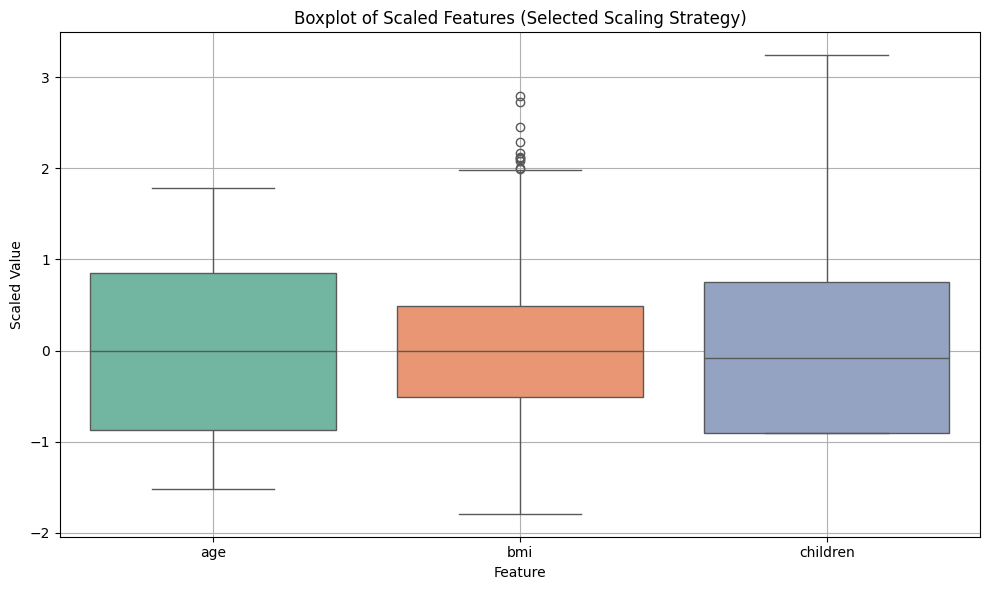

In [69]:
# 22. Feature Scaling

df_scaled = df_label_encoded.copy()  # FIXED: changed from df_encoded to df_label_encoded

# Apply StandardScaler to 'age' and 'children'
scaler_standard = StandardScaler()
df_scaled[['age', 'children']] = scaler_standard.fit_transform(df_scaled[['age', 'children']])

# Apply RobustScaler to 'bmi'
scaler_robust = RobustScaler()
df_scaled[['bmi']] = scaler_robust.fit_transform(df_scaled[['bmi']])

# Prepare a melted DataFrame for boxplot visualization
df_melted = df_scaled[['age', 'bmi', 'children']].melt(var_name='Feature', value_name='Scaled Value')

# Plot boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Scaled Value', data=df_melted, palette='Set2')
plt.title('Boxplot of Scaled Features (Selected Scaling Strategy)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# 23. Split Data

X = df_label_encoded.drop('charges', axis=1)
y = df_label_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# **Step 4 and Step 5 : Model Building and Evaluation**

# Modeling :- In this step, we select and train different regression models to predict the insurance charges.
# Evaluation :- In this step, we evaluate the performance of the models using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score.

In [72]:
# 23. Train Models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


# 9. Display Results

result_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", result_df)




Model Comparison:
                            MAE           MSE         RMSE        R2
Linear Regression  4259.770637  3.668514e+07  6056.825707  0.800360
Decision Tree      3222.802782  4.292426e+07  6551.660883  0.766406
Random Forest      2670.141945  2.210561e+07  4701.660047  0.879701
XGBoost            2621.098120  2.131377e+07  4616.683891  0.884011


# *Best Prediction model*

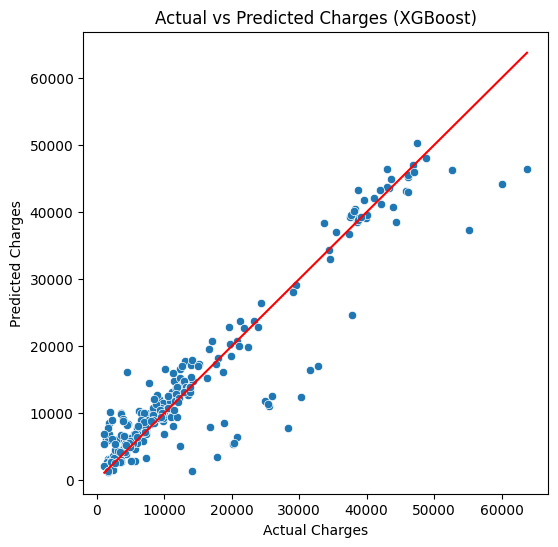

In [73]:

# 25. Plot Predictions of Best Model

best_model_name = result_df['R2'].idxmax()
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Actual vs Predicted Charges ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [75]:
# 26. Predict Insurance Charges for New Input

# Example new input
new_data = pd.DataFrame({
    'age': [35],
    'sex': ['male'],
    'bmi': [28.5],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
})

# Manually re-fit LabelEncoders using original dataset
encoded_new_data = new_data.copy()

# Refit LabelEncoders using the training data columns
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    le.fit(df[col])  # use original data column to fit
    encoded_new_data[col] = le.transform(new_data[col])

# Predict using the best model
predicted_charge = best_model.predict(encoded_new_data)[0]
print(f"Predicted Insurance Charge: ${predicted_charge:.2f}")


Predicted Insurance Charge: $5853.29
